<a href="https://colab.research.google.com/github/MadhurimaPaul-87/Machine_Learning/blob/main/CatVsDog_img_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing packages**

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Data Loading**

In [3]:
_URL="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_dir=tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL,extract=True)

68608000/68606236 [==============================] - 0s 0us/step


In [4]:
zip_dir_base=os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [5]:
base_dir= os.path.join(os.path.dirname(zip_dir), "cats_and_dogs_filtered")
train_dir = os.path.join(base_dir,'train')
validation_dir= os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

**Understanding our data**

In [6]:
num_cats_tr= len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val= len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [7]:
print("Total training cat images", num_cats_tr)
print("Total training dog images", num_dogs_tr)

print("Total validation cat images", num_cats_val)
print("Total validation dog images", num_dogs_val)

print("Total training images", total_train)
print("Total validation images", total_val)

Total training cat images 1000
Total training dog images 1000
Total validation cat images 500
Total validation dog images 500
Total training images 2000
Total validation images 1000


**Setting model parameters**

In [9]:
BATCH_SIZE=100
IMG_SHAPE=150

**Data Augmentation**

In [10]:
def plotImages(images_arr):
  fig, axes= plt.subplots(1, 5, figsize=(20,20))
  axes= axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

**Flipping the image horizontally**

In [15]:
image_gen= ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen= image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                      directory=train_dir,
                                      shuffle=True,
                                      target_size=(IMG_SHAPE,IMG_SHAPE),
                                      class_mode='binary')


Found 2000 images belonging to 2 classes.


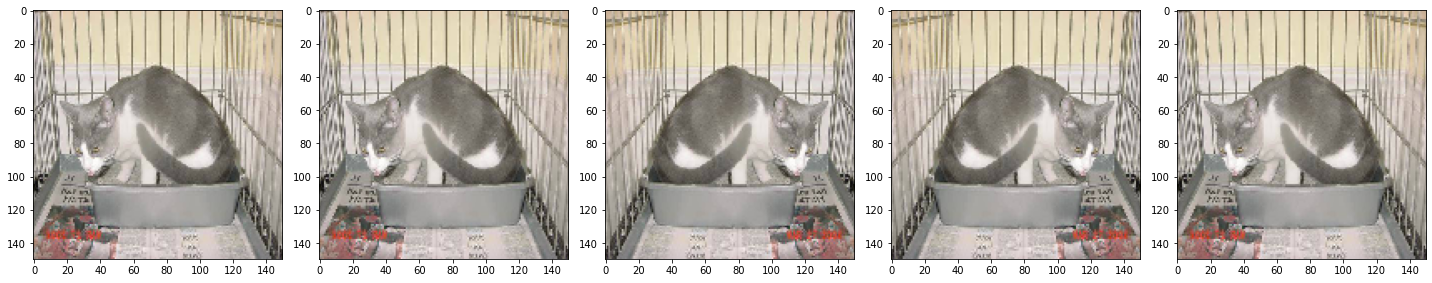

In [16]:
augmented_images=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Rotating the image**

In [19]:
image_gen= ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen= image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                      directory=train_dir,
                                      shuffle=True,
                                      target_size=(IMG_SHAPE,IMG_SHAPE),
                                      class_mode='binary')


Found 2000 images belonging to 2 classes.


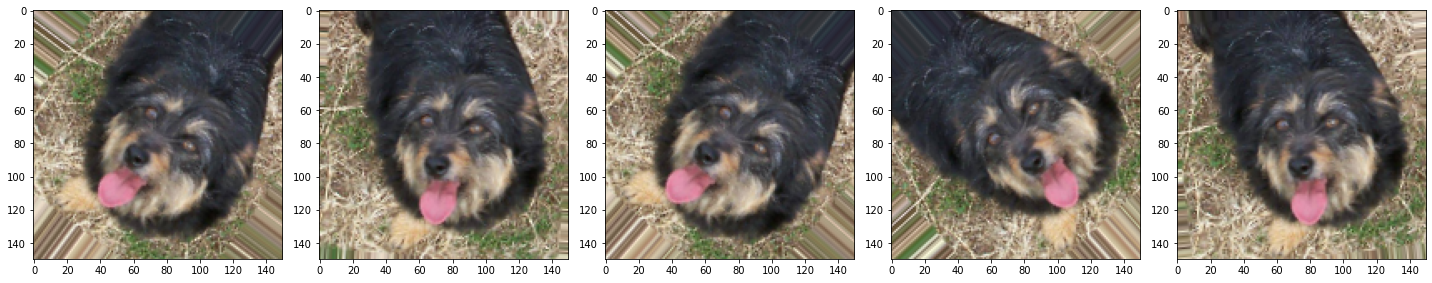

In [20]:
augmented_images=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Applying zoom**

In [21]:
image_gen= ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen= image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                      directory=train_dir,
                                      shuffle=True,
                                      target_size=(IMG_SHAPE,IMG_SHAPE),
                                      class_mode='binary')

Found 2000 images belonging to 2 classes.


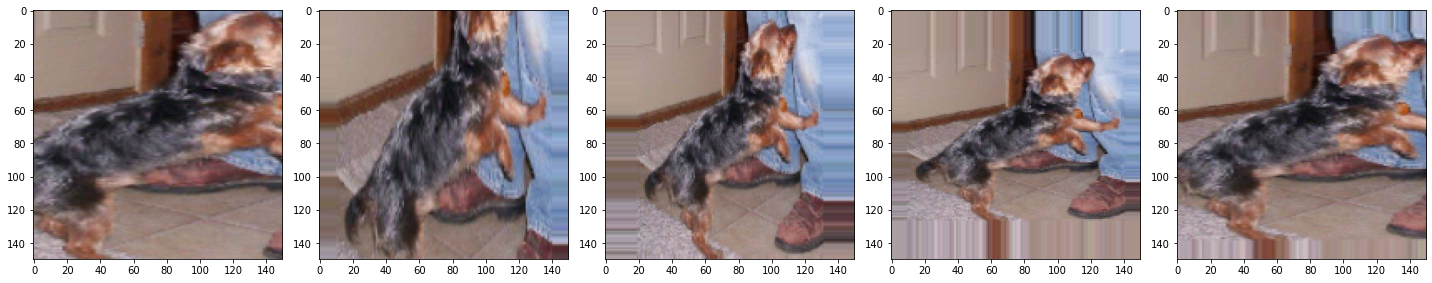

In [22]:
augmented_images=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Putting it altogether**

In [24]:
image_gen= ImageDataGenerator(rescale=1./255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

train_data_gen= image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                      directory=train_dir,
                                      shuffle=True,
                                      target_size=(IMG_SHAPE,IMG_SHAPE),
                                      class_mode='binary')

Found 2000 images belonging to 2 classes.


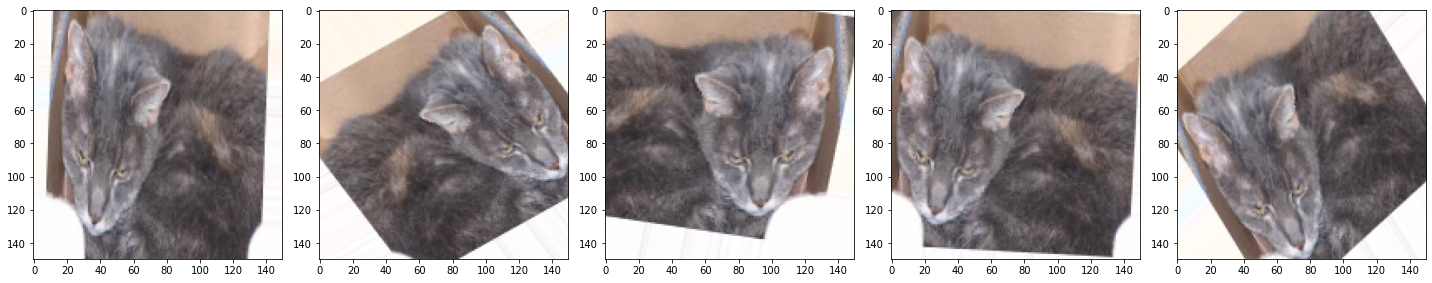

In [26]:
augmented_images=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Creating validation data generator**

In [27]:
image_gen_val =ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                         directory=validation_dir,
                                         shuffle=False,
                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                         class_mode='binary')

Found 1000 images belonging to 2 classes.


**Define the model**

In [28]:
model= tf.keras.models.Sequential([
       tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(150,150,3)),
       tf.keras.layers.MaxPooling2D(2,2),

       tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation=tf.nn.relu),
       tf.keras.layers.MaxPooling2D(2,2),
      
       tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation=tf.nn.relu),
       tf.keras.layers.MaxPooling2D(2,2),
       
       tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation=tf.nn.relu),
       tf.keras.layers.MaxPooling2D(2,2),

       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(512,activation=tf.nn.relu),
       tf.keras.layers.Dense(2,activation='softmax')
])

**Compile the model**

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Model summary**

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

**Train the model**

In [31]:
EPOCH=100
history= model.fit_generator(
        train_data_gen,
        steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),
        epochs=EPOCH,
        validation_data= val_data_gen,
        validation_steps=int(np.ceil(total_val/float(BATCH_SIZE)))

)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
20/20 [==============================] - 115s 6s/step - loss: 0.7589 - accuracy: 0.4965 - val_loss: 0.6929 - val_accuracy: 0.5110
Epoch 2/100
20/20 [==============================] - 112s 6s/step - loss: 0.6928 - accuracy: 0.5120 - val_loss: 0.6881 - val_accuracy: 0.6310
Epoch 3/100
20/20 [==============================] - 112s 6s/step - loss: 0.6923 - accuracy: 0.5464 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 4/100
20/20 [==============================] - 114s 6s/step - loss: 0.6911 - accuracy: 0.4992 - val_loss: 0.6815 - val_accuracy: 0.5040
Epoch 5/100
20/20 [==============================] - 113s 6s/step - loss: 0.6827 - accuracy: 0.5497 - val_loss: 0.6929 - val_accuracy: 0.5360
Epoch 6/100
20/20 [==============================] - 114s 6s/step - loss: 0.6700 - accuracy: 0.5736 - val_loss: 0.6291 - val_accuracy: 0.6540
Epoch 7/100
20/20 [==============================] - 113s 6s/step - loss: 0.6708 - accuracy: 0.5822 - val_loss: 0.6345 - val_accuracy: 0.6640
Epoch 

**Visualizing result of the training**

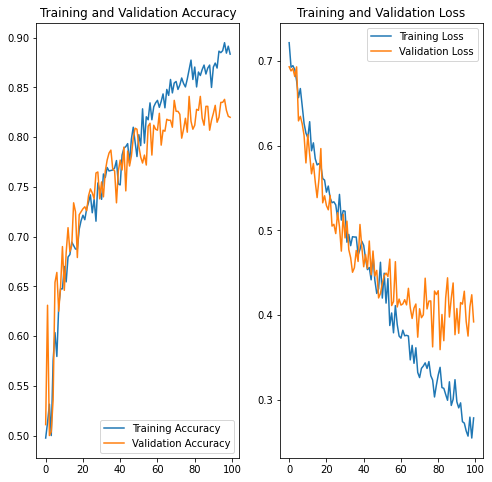

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()